In [1]:
import nibabel as nib
import os
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def show(i,s):

    plt.figure( )
    plt.imshow(i, cmap='Greys_r')
    plt.title(s)
    plt.show( )


def load_file(section):

    root= r"C:\Users\Tashrif Billah\Downloads\117122\unprocessed\3T"
    path= os.path.join(root, section, "117122_3T_"+ section+ ".nii.gz")
    img = nib.load(path)

    return img


def plotting(img):
    # Part 2, step 1
    # Histogram of the entire 3D volume

    m,n,f= np.shape(img.dataobj)
    a= np.reshape(img.dataobj,(m*n*f,1))
    plt.hist(a, normed=True, bins=20)
    plt.xlabel('Voxel Intensities')
    plt.ylabel('Probability')
    plt.title('Histogram of voxel intensities')
    plt.grid(True)
    plt.show(block= False)


    # Part 2, step 2
    # Average intensity by slice

    ax0= np.mean(img.dataobj,axis=0)
    show(ax0, 'X axis average intensity')

    ax1= np.mean(img.dataobj,axis=1)
    show(ax1, 'Y axis average intensity')

    ax2= np.mean(img.dataobj,axis=2)
    show(ax2, 'Z axis average intensity')


    # Part 2, step 3
    # Thresholding out 1/3 of the voxels by intensity
    # and plotting the middle slice along each image axis

    cdata= img.get_data( )
    ref= np.max(cdata)/3
    cdata[cdata<ref]= 0

    # m, n, f = np.shape(img.dataobj)
    ax0= cdata[int(m/2)-1,0:n,0:f]
    show(ax0, 'X axis middle slice')

    ax1= cdata[0:m,int(n/2)-1,0:f]
    show(ax1, 'Y axis middle slice')

    ax2= cdata[0:m,0:n,int(f/2)-1]
    show(ax2, 'Z axis middle slice')

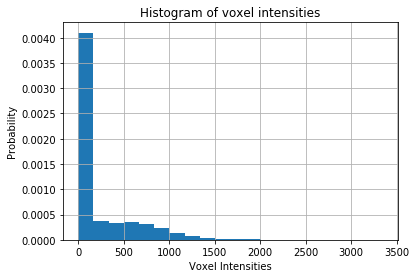

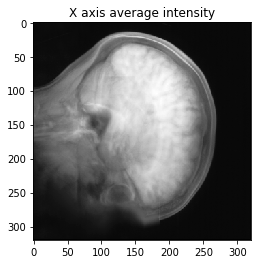

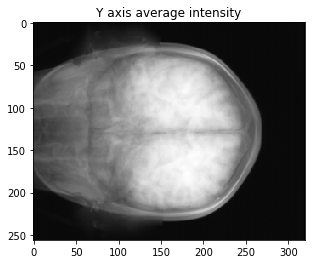

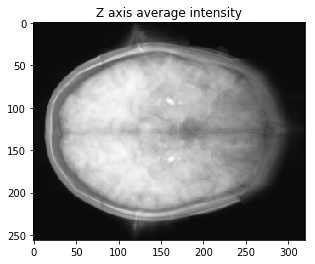

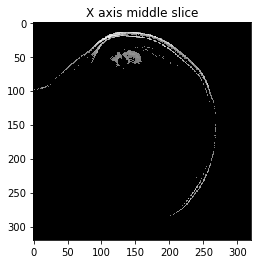

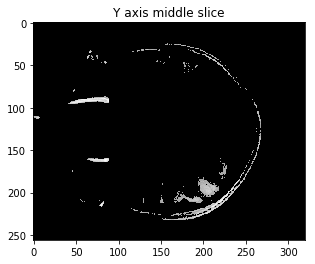

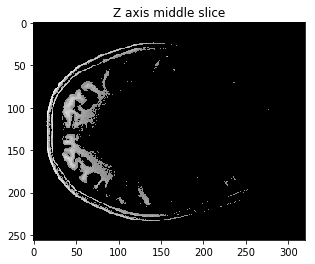

In [5]:
# T1 images
img = load_file("T1w_MPR1")
plotting(img)

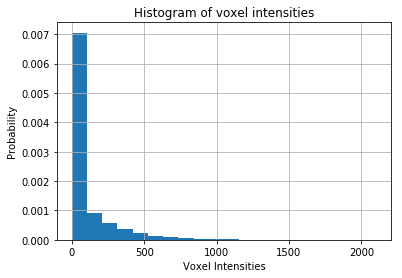

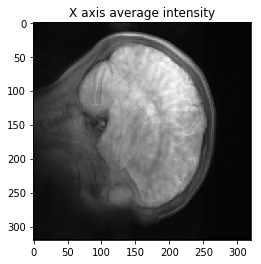

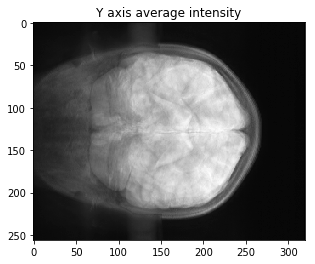

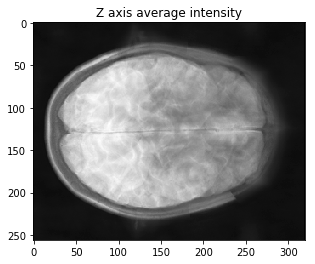

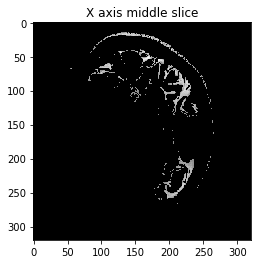

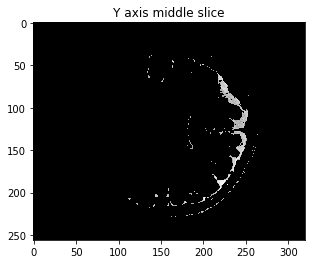

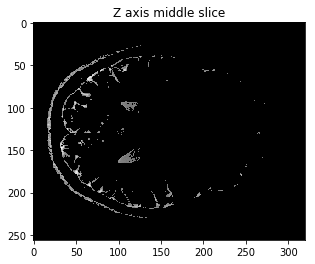

In [6]:
# T2 images
img = load_file("T2w_SPC1")
plotting(img)